In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats

/Users/son520804/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
import arviz as az
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [6]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1130.43draws/s]


## Summarizing the posterior

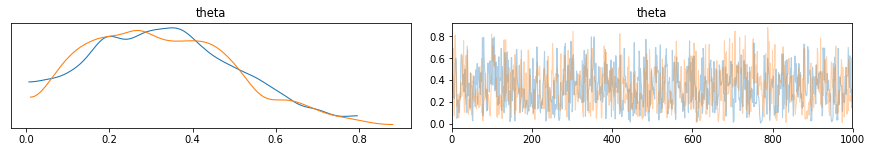

In [11]:
az.plot_trace(trace)
plt.show()

In [14]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.333,0.176,0.02,0.635,0.006,0.004,851.0,851.0,816.0,834.0,1.0


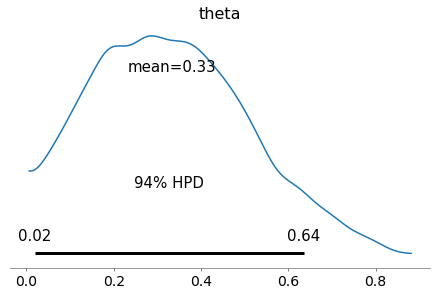

In [15]:
az.plot_posterior(trace)
plt.show()

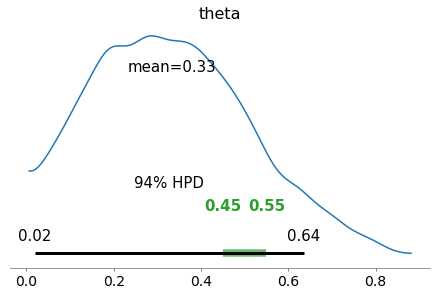

In [16]:
az.plot_posterior(trace, rope=[0.45, .55])
plt.show()

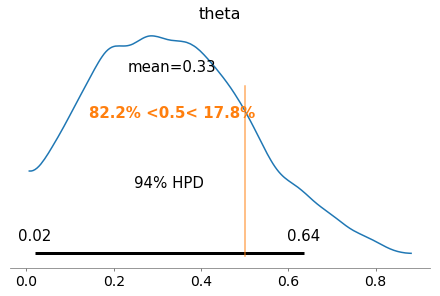

In [17]:
az.plot_posterior(trace, ref_val=0.5) 
plt.show()